**CC GENERAL**

This case requires developing customer segmentation to define the marketing strategy. An example dataset summarizes the usage behavior of approximately 9,000 active credit card holders over the past 6 months. The file is at the customer level with 18 behavioral variables.

Here is the data dictionary for the credit card dataset:

* CUSTID: Cardholder identification
* BALANCE: Remaining balance amount on the account to make purchases
* BALANCEFREQUENCY: Frequency of updating the balance, a score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
* PURCHASES: Amount of purchases made from the account
* SINGLE PURCHASES: Maximum amount of purchases made at once
* CHARGED PURCHASES: Amount of purchases made in multiple installments
* CASHADVANCE: Advance payment given by the user
* PURCHASESFREQUENCY: Frequency of purchases, a score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
* ONEOFFPURCHASESFREQUENCY: Frequency of one-off purchases (1 = frequently purchased, 0 = infrequent)
* PURCHASESINSTALLMENTSFREQUENCY: Frequency of installment purchases (1 = frequently made, 0 = infrequent)
* CASHADVANCEFREQUENCY: Frequency of cash advance payments
* CASHADVANCETRX: Number of transactions made with "Cash in Advance"
* PURCHASESTRX: Number of purchase transactions made
* CREDITLIMIT: Credit card limit for the user
* PAYMENTS: Amount of payments made by the user
* MINIMUM_PAYMENTS: Minimum amount of payments made by the user
* PRCFULLPAYMENT: Percentage of the total payment paid by the user
* TENURE: Duration of the credit card service for the user

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns
import os
import scipy.cluster.hierarchy as sch #Hierachical Clustering

from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans, AgglomerativeClustering

In [2]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/ccdata/CC GENERAL.csv


In [3]:
data = pd.read_csv('../input/ccdata/CC GENERAL.csv')
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
data.shape

(8950, 18)

In [5]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [6]:
data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [7]:
# Suppression des valeurs nulles et de la colonne "CUST_ID"
data = data.drop("CUST_ID", axis=1)
data = data.dropna(axis=0)
data.shape

(8636, 17)

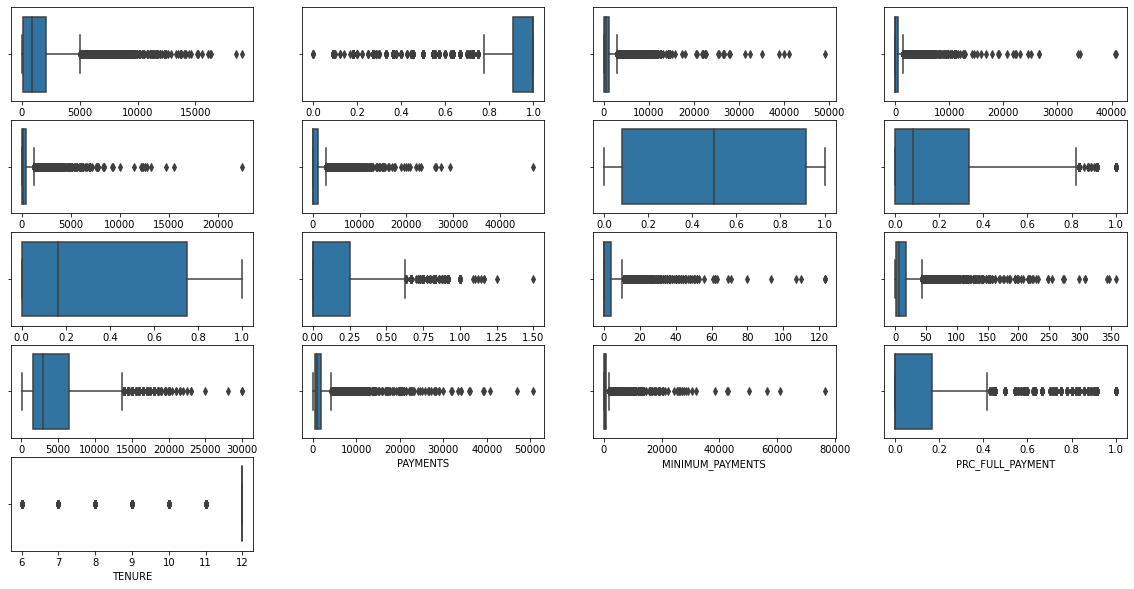

In [8]:
# Recherche d'outliers
fig = plt.figure(figsize=(20, 10))
for i, col in enumerate(data.columns, 1):
    ax = fig.add_subplot(5, 4, i)
    sns.boxplot(x=data[col], ax=ax)

It appears there are multiple outliers. Let's examine the correlations between the different variables.

<AxesSubplot:>

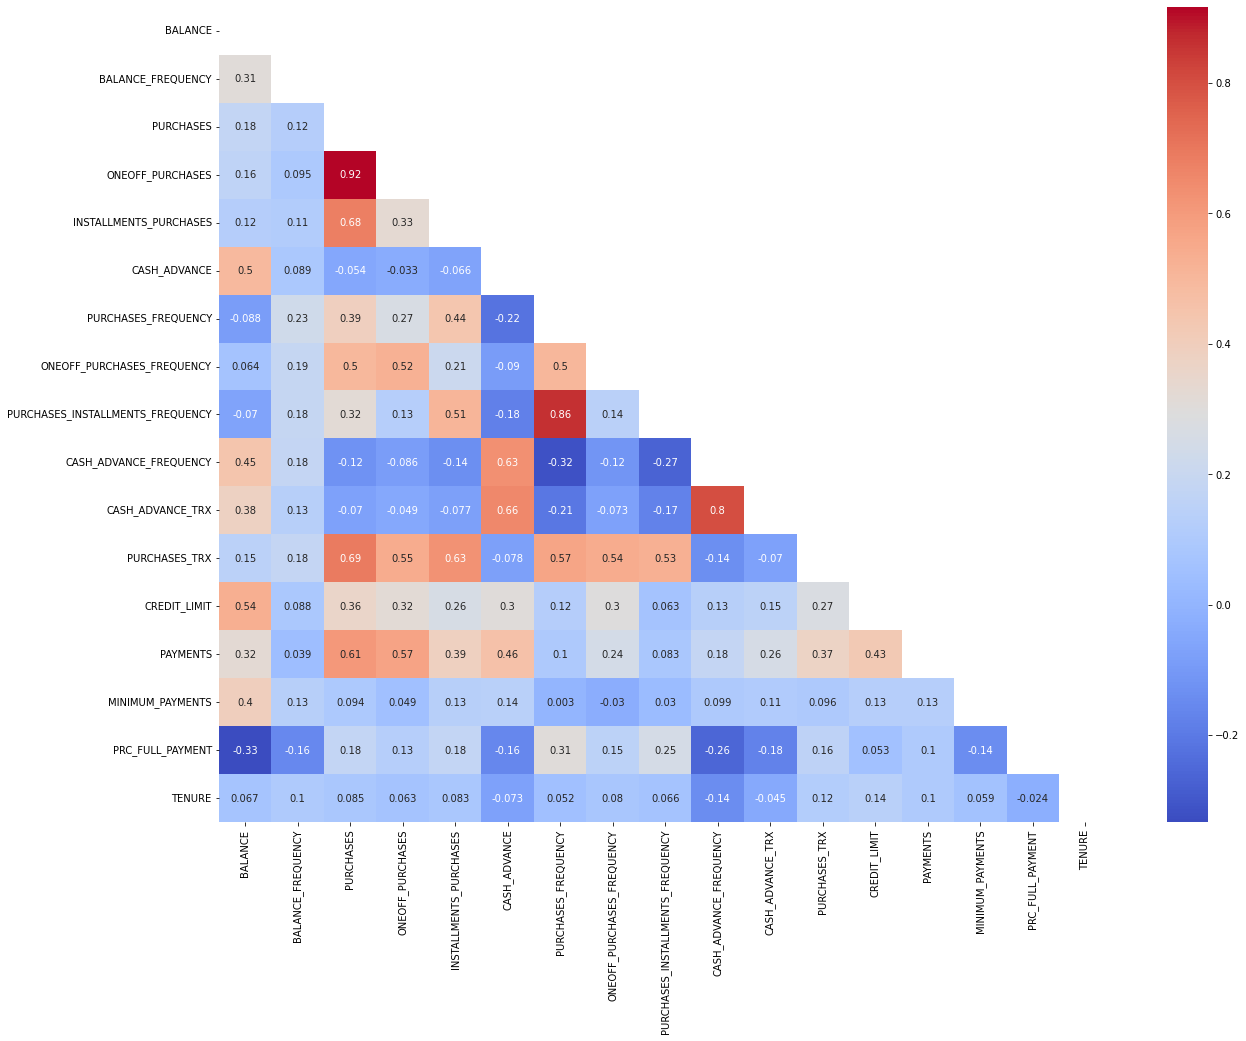

In [9]:
# HeatMap
plt.figure(figsize=(20, 15))
mask = np.zeros_like(data.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data.corr(), annot=True, cmap = 'coolwarm', mask=mask)

In [10]:
# Standardization of the data
std = StandardScaler()
data_std = std.fit_transform(data)
new_data_std = pd.DataFrame(data_std, columns=data.columns)
new_data_std.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.744625,-0.370047,-0.429184,-0.359160,-0.354826,-0.468655,-0.820769,-0.686280,-0.717179,-0.681953,-0.479437,-0.517623,-0.962575,-0.543942,-0.305508,-0.537727,0.355181
1,0.764152,0.067679,-0.473208,-0.359160,-0.458839,2.568556,-1.236139,-0.686280,-0.926522,0.557022,0.099258,-0.597054,0.677204,0.796852,0.087689,0.212380,0.355181
2,0.426602,0.505405,-0.116413,0.099909,-0.458839,-0.468655,1.256077,2.646651,-0.926522,-0.681953,-0.479437,-0.120467,0.813852,-0.399503,-0.099906,-0.537727,0.355181
3,-0.373910,0.505405,-0.465825,-0.349660,-0.458839,-0.468655,-1.028455,-0.408536,-0.926522,-0.681953,-0.479437,-0.557339,-0.907916,-0.380165,-0.261131,-0.537727,0.355181
4,0.099551,0.505405,0.142062,-0.359160,0.994815,-0.468655,0.425339,-0.686280,0.538882,-0.681953,-0.479437,-0.279329,-0.743938,-0.132119,0.650363,-0.537727,0.355181


**Hierachical Clustering**


In [11]:
# Searching for the best parameters for clustering.
results = []
nb_clusters = range(2, 10)
linkage = ['ward', 'complete', 'average', 'single']
distance = ['euclidean', 'manhattan']

for i in nb_clusters:
    for j in linkage:
        if(j == 'ward'):
            model = AgglomerativeClustering(n_clusters=i, linkage=j, affinity="euclidean")
            preds = model.fit_predict(new_data_std)
            results.append([i, j, "euclidean", silhouette_score(new_data_std, preds)])
        else:
            for k in distance:
                model = AgglomerativeClustering(n_clusters=i, linkage=j, affinity=k)
                preds = model.fit_predict(new_data_std)
                results.append([i, j, k, silhouette_score(new_data_std, preds)])

results_df = pd.DataFrame(results, columns=['Clusters', 'Linkage', 'Affinity', 'Score'])
results_df = results_df.sort_values('Score', ascending=False)
results_df.head()

,Clusters,Linkage,Affinity,Score
3,2,average,euclidean,0.838913
4,2,average,manhattan,0.838913
5,2,single,euclidean,0.838913
6,2,single,manhattan,0.838913
12,3,single,euclidean,0.835953


In [12]:
# Let's choose between n_clusters = [3, 4, 5], affinity="euclidean," and linkage="single."
new_clusters = [3,4, 5]
for i in new_clusters:
    ag_model = AgglomerativeClustering(n_clusters=i, linkage="single", affinity="euclidean")
    preds = ag_model.fit_predict(new_data_std)
    print(("{} clusters => Accuracy = {}%").format(i, round(silhouette_score(new_data_std, preds)*100,2)))

3 clusters => Accuracy = 83.6%
4 clusters => Accuracy = 80.94%
5 clusters => Accuracy = 80.89%


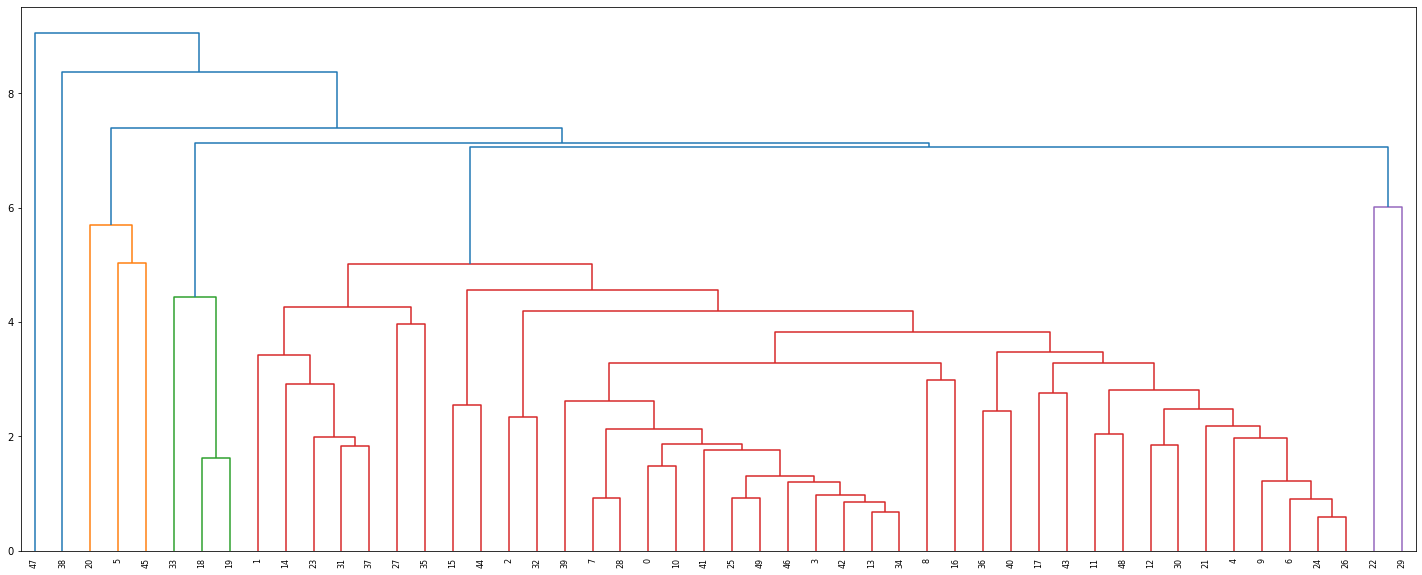

In [13]:
# Dendrogram
plt.figure(figsize=(25,10))
dendrogramme = sch.dendrogram(sch.linkage(new_data_std[:50], method='average')) #Limitons à 50

This dendrogram was created with a final subdivision into 4 groups, thus forming 4 clusters.

**KMeans**

In [14]:
# Appliquons la PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(new_data_std)
pca_data = pd.DataFrame(pca_data, columns=['PC1', 'PC2'])
pca_data.head()

,PC1,PC2
0,-1.696396,-1.122575
1,-1.215685,2.435684
2,0.935864,-0.385263
3,-1.614639,-0.724577
4,0.223707,-0.783648


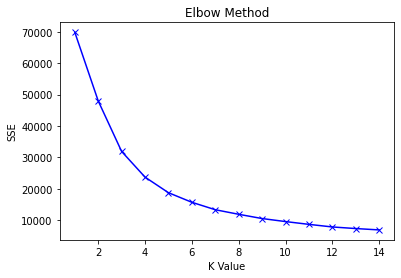

In [15]:
# Recherche de la meilleure de K grâce à la méthode du Coude
sum_squared_distances = []
k_values = range(1, 15)
for k in k_values:
    km = KMeans(n_clusters=k)
    km.fit(pca_data)
    sum_squared_distances.append(km.inertia_)
    
plt.plot(k_values, sum_squared_distances, 'bx-')
plt.xlabel("K Value")
plt.ylabel("SSE")
plt.title("Elbow Method")
plt.show()

The optimal value for K is 4.

Text(0, 0.5, 'PC2')

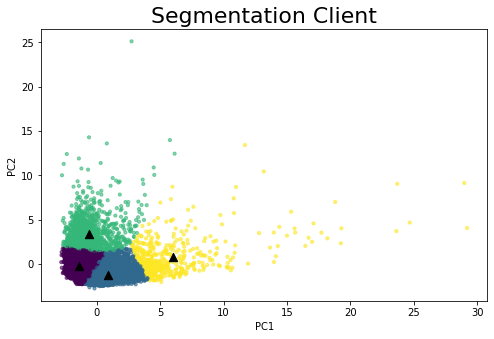

In [16]:
# Visualisation des 4 clusters
fig, ax = plt.subplots(1, figsize=(8,5))
kmeans = KMeans(n_clusters=4)
preds = kmeans.fit_predict(pca_data)

# plot data
plt.scatter(pca_data.PC1, pca_data.PC2, c=preds, alpha = 0.6, s=10)

# plot centroids
centroids = kmeans.cluster_centers_
cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]
plt.scatter(cen_x, cen_y, marker='^', c="#000000", s=70)
plt.title('Segmentation Client', fontsize=22)
plt.xlabel('PC1')
plt.ylabel('PC2')